In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
categories = {}
categories['af'] = 'Acuerdo Final'
categories['docs'] = 'Documentos'

In [3]:
with open('../Lexicon/lexicon.json') as lexicon_json:    
    lexicon = json.load(lexicon_json)

In [4]:
len(lexicon)

1218720

## Filtering verbs from dataset

In [5]:
plural1P = []
plural3P = []
for i in range(0, len(lexicon)):
    if(lexicon[i]['category'] == 'verb' and lexicon[i]['features']['number']=='plur'):
        if(lexicon[i]['features']['person'] == '1'):
            plural1P.append(lexicon[i]['word'])
        elif(lexicon[i]['features']['person'] == '3'):
            plural3P.append(lexicon[i]['word'])

In [7]:
stop_words_spanish = ['un', 'una', 'unas', 'unos', 'uno', 'sobre', 'todo', 'también', 'tras', 'otro', 'algún', 'alguno', 'alguna', 'algunos', 'algunas', 'como', 'en', 'para', 'atras', 'porque', 'por qué',  'ante', 'antes', 'ambos', 'pero', 'por', 'cada', 'fin', 'incluso', 'primero', 'desde', 'gueno', 'el', 'la', 'lo', 'las', 'los', 'su', 'aqui', 'mio', 'tuyo', 'ellos', 'ellas', 'nos', 'nosotros', 'vosotros', 'vosotras', 'si', 'dentro', 'solo', 'solamente','ultimo', 'largo', 'bastante', 'haces', 'muchos', 'aquellos', 'aquellas', 'sus', 'entonces', 'tiempo', 'verdad', 'verdadero', 'verdadera', 'cierto', 'ciertos', 'cierta', 'ciertas', 'dos', 'bajo', 'arriba', 'encima', 'valor', 'muy', 'modo', 'bien', 'cual', 'cuando', 'donde', 'mientras', 'quien', 'con', 'entre', 'sin', 'trabajo', 'yo', 'aquel', 'a', 'en', 'de', 'para', 'por', 'según', 'sin', 'sobre', 'tras', 'bajo', 'contra', 'hacia', 'hasta', 'rt', 'que', 'se', 'no', 'del', 'al', 'http', 'https', 'y', 'más', 'todos', 'año', 'este', 'vía', 'les', 'ni', 'dice', 'le', 'qué', 'hay', 'htt', 'quiere', 'nuestra', 'sí', 'of', 'in', 'años', 'nuevo', 'hoy', 'ayer', 'inicio', 'ya', 'histórico', 'día','son', 'final', 'and', 'with', 'you', 'mundo', 'gran', 'sol', 'millones', 'gracias', 'hermana', 'fuego', 'me', 'eso',  'we', 'after', 'camino', 'caminos', 'mejores', 'mejor', 'deseos', 'nuevamente', 'ahora', 'definitiva', 'ese', 'definitivo', 'han', 'sino', 'tal', 'mismos', 'estos', 'así', 'esto', 'esta', 'sido', 'manera']

In [8]:
def fetch_files_from(path):
    files = []    
    for filename in glob.glob(os.path.join(path, '*.txt')):
        with open(filename) as f:
            files.append(f.read())
    return files

def getNumberOfVerbs(word_data):
    count1 = 0
    count3 = 0
    words = word_data.lower().split()
    for w in words:
        if w in stop_words_spanish:
            continue
        if w in plural1P:
            count1 = count1 + 1
        elif w in plural3P:
            count3 = count3 + 1            
    print ('Primera Persona del Plural: ', count1)
    print ('Tercera Persona del Plural: ', count3)    
    return count1, count3

## Cantidad de veces que aparece un verbo en primera y tercera persona del plural 

In [63]:
for cat in categories:                 
    for  files in os.walk('data/mesa/'+ cat):    
        if(len(files[2])>0):
            path = files[0]
            print(categories[cat],'--', path.replace('data/mesa/'+ cat , '') ,'\n')    
            word_dataset= fetch_files_from(path)
            word_data = '\n'.join(word_dataset)            
            getNumberOfVerbs(word_data)
            print('---------------------------------')
            print()

Documentos -- /Informes 

Primera Persona del Plural:  86
Tercera Persona del Plural:  364
---------------------------------

Documentos -- /Comunicados/2015 

Primera Persona del Plural:  69
Tercera Persona del Plural:  176
---------------------------------

Documentos -- /Comunicados/2013 

Primera Persona del Plural:  76
Tercera Persona del Plural:  189
---------------------------------

Documentos -- /Comunicados/2014 

Primera Persona del Plural:  147
Tercera Persona del Plural:  169
---------------------------------

Documentos -- /Comunicados/2012 

Primera Persona del Plural:  9
Tercera Persona del Plural:  37
---------------------------------

Documentos -- /Comunicados/2016 

Primera Persona del Plural:  169
Tercera Persona del Plural:  343
---------------------------------

Documentos -- /Borradores 

Primera Persona del Plural:  60
Tercera Persona del Plural:  936
---------------------------------

Acuerdo Final --  

Primera Persona del Plural:  74
Tercera Persona del Plur

In [ ]:
df = pd.read_csv('data/mesa_files_new.csv')
df.columns = ['ID', 'path', 'category', 'sub_cat', 'date', 'filename']
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y");
df = df.sort_values(by=['category', 'sub_cat', 'date'])
sLength = len(df['ID'])
df.loc[:,'1P'] = pd.Series([0] * sLength, index=df.index)
df.loc[:,'3P'] = pd.Series([0] * sLength, index=df.index)

df.loc[0,'3P'] = 2463
df.loc[0,'1P'] = 74

for index, row in df.iterrows():
    if(row[0] == 0):
        continue
    print(row[2], ' -- /', row[3], ' -- / ', row[5] )    
    path = row[1] +'/' +  row[5]            
    file = open(path)
    word_data = file.read()
    count1, count3 = getNumberOfVerbs(word_data)
    df.loc[index, '1P'] = count1
    df.loc[index, '3P'] = count3
    print('---------------------------------')
    print()


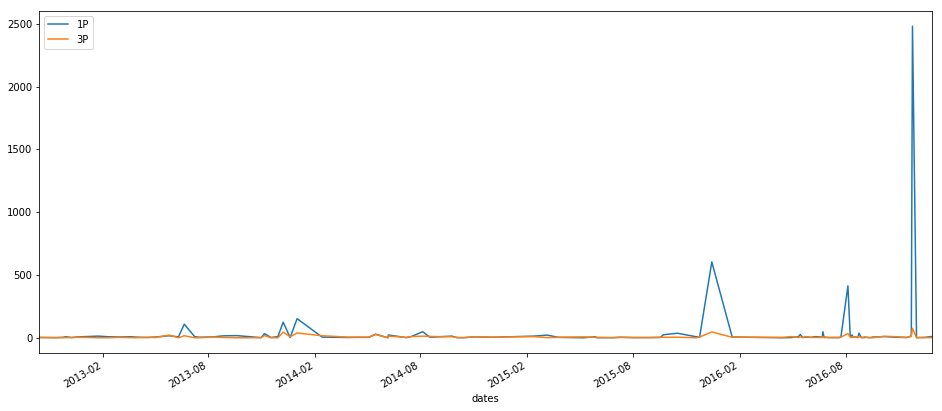

In [31]:
import matplotlib.pyplot as plt

dates = df['date'].values
p3 = df['1P'].values
p1 = df['3P'].values

data1 = pd.DataFrame({'dates': dates, 
        'p1': p1})
data2 = pd.DataFrame({'dates': dates, 
        'p3': p3})

data1=data1.groupby(['dates']).sum()
data2=data2.groupby(['dates']).sum()

aux_df = pd.DataFrame({'1P': data1.p1, '3P': data2.p3}, index=data1.index)

aux_df.plot(figsize=(16,7), kind='line');

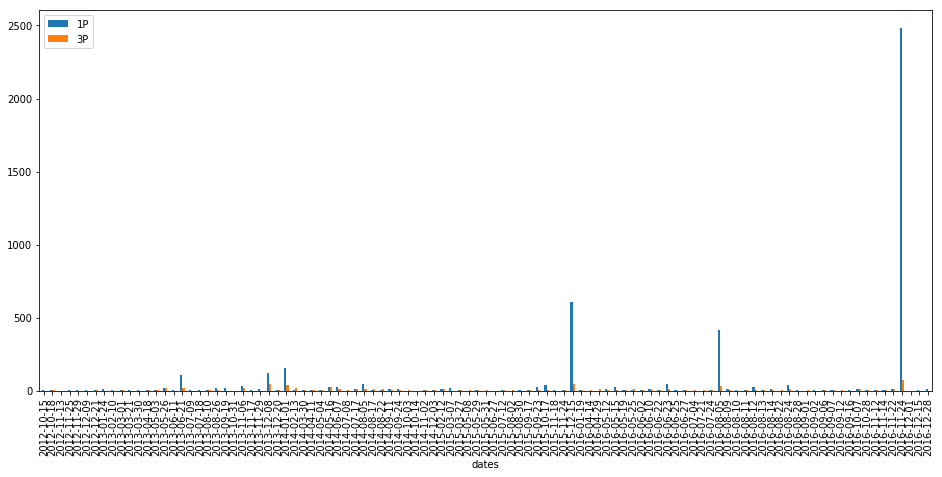

In [32]:
aux_df = aux_df.sort_index()
aux_df.index = aux_df.index.map(lambda t: t.strftime('%Y-%m-%d'))
aux_df = aux_df[(aux_df.T!= 0).any()]
aux_df.plot(figsize=(16,7), kind='bar');

### Cantidad de veces que aparece un verbo en primera y tercera persona del plural(eliminado el acuerdo final que es el outlier más significativo)

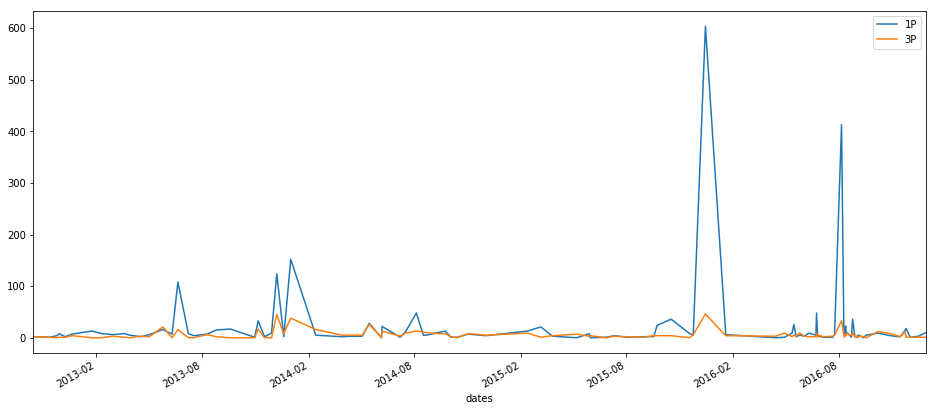

In [44]:
df = df.drop([0])
dates = df['date'].values
p3 = df['1P'].values
p1 = df['3P'].values

data1 = pd.DataFrame({'dates': dates, 
        'p1': p1})
data2 = pd.DataFrame({'dates': dates, 
        'p3': p3})

data1=data1.groupby(['dates']).sum()
data2=data2.groupby(['dates']).sum()

aux_df = pd.DataFrame({'1P': data1.p1, '3P': data2.p3}, index=data1.index)

aux_df.plot(figsize=(16,7), kind='line');

## 20 Documentos que utilizan más la Primera Persona del Plural

In [25]:
pd.set_option('display.max_colwidth', -1)
df.drop(['path', 'ID', 'category'], axis=1).sort_values(['1P', '3P'], ascending=False).head(20)

,sub_cat,date,filename,1P,3P
0,Acuerdo_Final,2016-11-24,a.txt,74,2463
4,Informes,2014-01-01,"Informe_Conjunto,_Mesa_de_Conversaciones,_enero_de_2014-Espa_ol.txt",38,152
120,Borradores,2016-08-05,03-1470450177.-protocolos-mmv-1470450177.txt,31,136
114,Borradores,2015-12-15,borrador-conjunto-acuerdo-sobre-las-victimas-del-conflicto-1450190262.txt,29,556
2,Informes,2013-12-08,"Informe_Conjunto_Nro_2,_Punto_02_de_la_Agenda_-_08_diciembre_2013_-_Versi_n_Espa_ol.txt",26,88
44,Comunicados,2014-05-16,"Comunicado_Conjunto,_La_Habana,_16_de_mayo_de_2014,_Versi_n_Espa_ol.txt",26,28
22,Comunicados,2013-05-26,"Comunicado_Conjunto,_La_Habana,_26_d_emayo_de_2013_-_Versi_n_Espa_ol_-_PDF.txt",21,16
9,Comunicados,2015-12-15,comunicado-conjunto-64-15-de-diciembre-de-2015-1450190009.txt,17,48
39,Comunicados,2013-11-06,"Comunicado_Conjunto,_La_Habana,_06_de_noviembre_de_2013_-_Versi_n_Espa_ol.txt",17,33
57,Comunicados,2014-02-13,"Comunicado_Conjunto,_La_Habana,_13_de_febrero_de_2014-Versi_n_Espa_ol.txt",16,5


## 20 Documentos que utilizan más la Tercera Persona del Plural

In [26]:
pd.set_option('display.max_colwidth', -1)
df.drop(['path', 'ID', 'category'], axis=1).sort_values(['3P', '1P'], ascending=False).head(20)

,sub_cat,date,filename,1P,3P
0,Acuerdo_Final,2016-11-24,a.txt,74,2463
114,Borradores,2015-12-15,borrador-conjunto-acuerdo-sobre-las-victimas-del-conflicto-1450190262.txt,29,556
4,Informes,2014-01-01,"Informe_Conjunto,_Mesa_de_Conversaciones,_enero_de_2014-Espa_ol.txt",38,152
120,Borradores,2016-08-05,03-1470450177.-protocolos-mmv-1470450177.txt,31,136
112,Borradores,2016-08-05,05-1470450340.-protocolo-de-seguridad-1470450340.txt,0,99
1,Informes,2013-06-21,Informe__Conjunto_1-_Mesa_de_Conversaciones_-Gobierno_y_Farc_-_Version_Espa_ol.txt,14,93
2,Informes,2013-12-08,"Informe_Conjunto_Nro_2,_Punto_02_de_la_Agenda_-_08_diciembre_2013_-_Versi_n_Espa_ol.txt",26,88
9,Comunicados,2015-12-15,comunicado-conjunto-64-15-de-diciembre-de-2015-1450190009.txt,17,48
45,Comunicados,2014-08-05,"Comunicado_Conjunto,_La_Habana,_05_agosto_2014-Versi_n_Espa_ol.txt",13,48
95,Comunicados,2016-06-23,comunicado-conjunto-no-76-1466705808.-la-habana-cuba-23-de-junio-de-2016-1466705808.txt,9,48


# Análisis de las palabras 'conflicto' y 'víctimas' (No incluye los textos del libro)

In [55]:
def countWords(word_data):
    count1 = 0
    count3 = 0
    words = word_data.lower().split()
    for w in words:
        if w == 'conflict' or w == 'conflicto':
            count1 = count1 + 1
        elif w is 'victima' or w == 'victimas' or w == 'víctimas' or w == 'víctimas':
            count3 = count3 + 1           
    return count1, count3


## Frecuencias de las palabras 'Conflicto' y 'Víctimas' (same line graph)

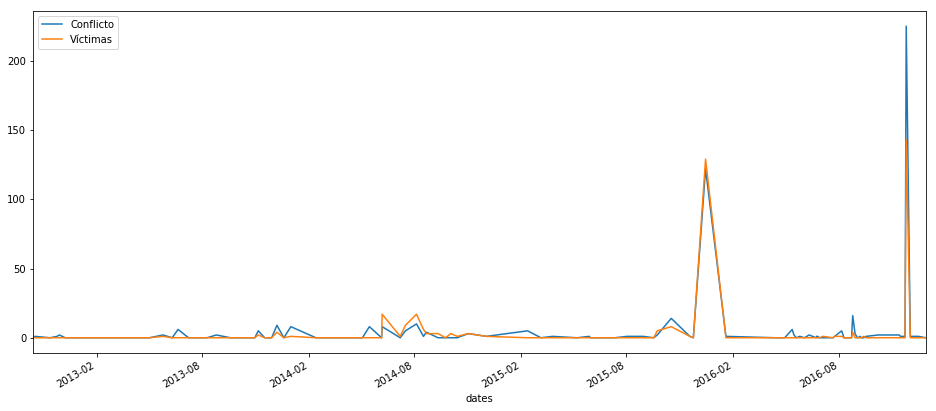

In [56]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 4.0)

df = pd.read_csv('data/mesa_files_new.csv')
df.columns = ['ID', 'path', 'category', 'sub_cat', 'date', 'filename']
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y");
df = df.sort_values(by=['category', 'sub_cat', 'date'])
sLength = len(df['ID'])
for index, row in df.iterrows():
    path = row[1] +'/' +  row[5]           
    file = open(path)
    word_data = file.read()
    file.close()
    count1, count3 = countWords(word_data)
    df.loc[index, 'conflict'] = count1
    df.loc[index, 'victims'] = count3
    
dates = df['date'].values
conflict = df['conflict'].values
victims = df['victims'].values

data1 = pd.DataFrame({'dates': dates, 
        'conflict': conflict})
data2 = pd.DataFrame({'dates': dates, 
        'victims': victims})

data1=data1.groupby(['dates']).sum()
data2=data2.groupby(['dates']).sum()
aux_df = pd.DataFrame({'Conflicto': data1.conflict, 'Víctimas': data2.victims}, index=data1.index)
aux_df.plot(figsize=(16,7), kind='line');

## Frecuencias de las palabras 'Conflicto' y 'Víctimas' (bar graph)

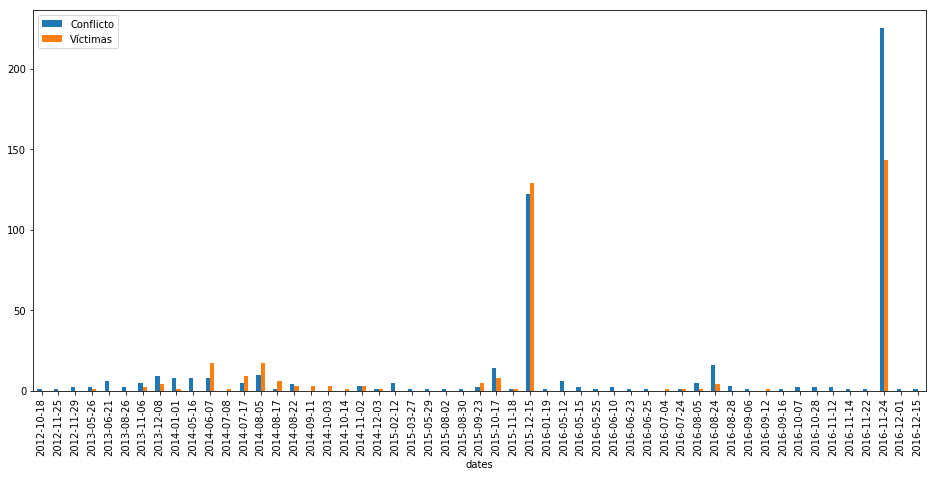

In [57]:
aux_df = aux_df.sort_index()
aux_df.index = aux_df.index.map(lambda t: t.strftime('%Y-%m-%d'))
aux_df = aux_df[(aux_df.T!= 0).any()]
aux_df.plot(figsize=(16,7), kind='bar');

## Frecuencias de las palabras 'Conflicto' y 'Víctimas' (bar graph logaritmic scale - better visualization)

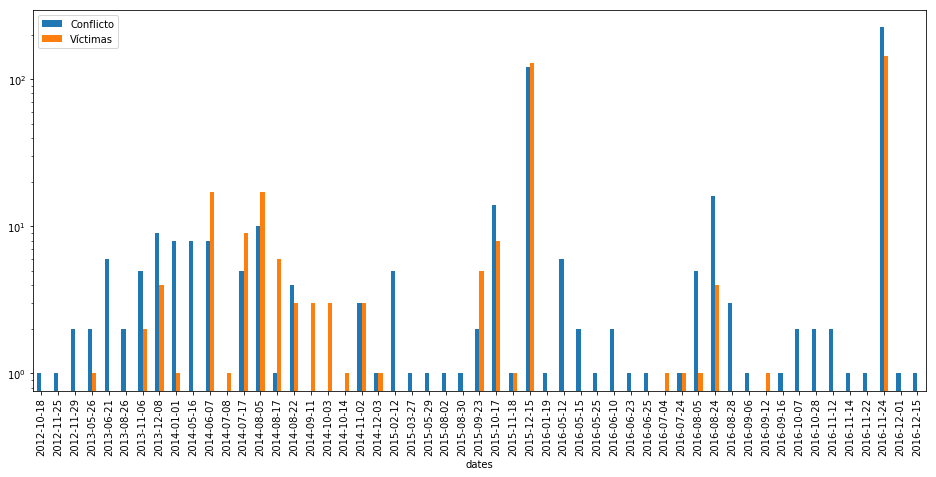

In [58]:
aux_df.plot(figsize=(16,7), kind='bar', logy=True);

## Frecuencias de las palabras 'Conflicto' y 'Víctimas' (different graphs)

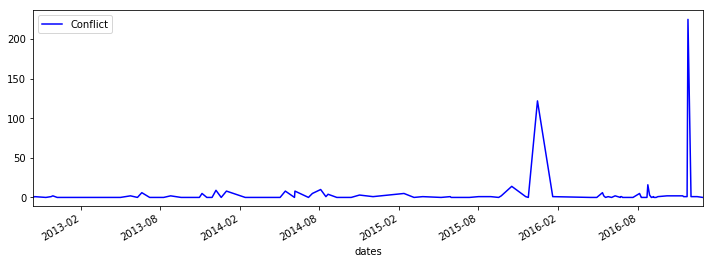

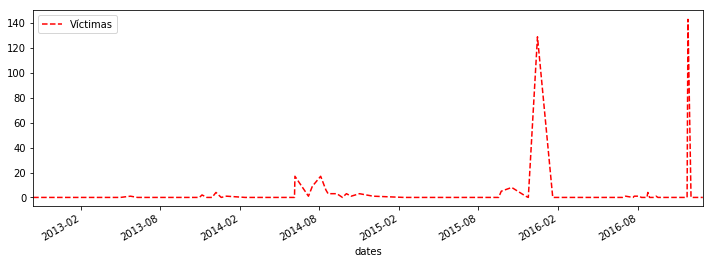

In [60]:
# Plot the data
data1.plot(x=data1.index,y='conflict', ls='solid', label='Conflict', color='blue', )

data2.plot(x=data2.index,y='victims', ls='--', label='Víctimas', color='red')

plt.legend(loc='best')
plt.show()

## 20 documentos que más utilizaron la palabra 'Conflicto' 

In [61]:
pd.set_option('display.max_colwidth', -1)
df1 = df[['sub_cat', 'date', 'filename', 'conflict', 'victims']].copy()
df1 = df1.sort_index()
df1 = df1[(df1.conflict>0) | (df1.victims > 0)]
df1.sort_values(['conflict'], ascending=False).head(20)

,sub_cat,date,filename,conflict,victims
0,Acuerdo_Final,2016-11-24,a.txt,224.0,143.0
114,Borradores,2015-12-15,borrador-conjunto-acuerdo-sobre-las-victimas-del-conflicto-1450190262.txt,106.0,110.0
9,Comunicados,2015-12-15,comunicado-conjunto-64-15-de-diciembre-de-2015-1450190009.txt,16.0,19.0
108,Comunicados,2016-08-24,comunicado-conjunto-93-la-habana-cuba-24-de-agosto-de-2016-1472079906.txt,16.0,4.0
20,Comunicados,2015-10-17,comunicado-conjunto--1445137230.txt,14.0,8.0
45,Comunicados,2014-08-05,"Comunicado_Conjunto,_La_Habana,_05_agosto_2014-Versi_n_Espa_ol.txt",10.0,17.0
53,Comunicados,2014-06-07,"Comunicado_Conjunto,_La_Habana,_07_de_junio_de_2014,_Versi_n_Espa_ol.txt",8.0,17.0
44,Comunicados,2014-05-16,"Comunicado_Conjunto,_La_Habana,_16_de_mayo_de_2014,_Versi_n_Espa_ol.txt",8.0,0.0
4,Informes,2014-01-01,"Informe_Conjunto,_Mesa_de_Conversaciones,_enero_de_2014-Espa_ol.txt",8.0,1.0
96,Comunicados,2016-05-12,comunicado-conjunto-69-la-habana-cuba-12-de-mayo-de-2016-1463089138.txt,6.0,0.0


## 20 documentos que mencionaron más la palabra 'Víctimas'

In [62]:
df1.sort_values(['victims'], ascending=False).head(20)

,sub_cat,date,filename,conflict,victims
0,Acuerdo_Final,2016-11-24,a.txt,224.0,143.0
114,Borradores,2015-12-15,borrador-conjunto-acuerdo-sobre-las-victimas-del-conflicto-1450190262.txt,106.0,110.0
9,Comunicados,2015-12-15,comunicado-conjunto-64-15-de-diciembre-de-2015-1450190009.txt,16.0,19.0
53,Comunicados,2014-06-07,"Comunicado_Conjunto,_La_Habana,_07_de_junio_de_2014,_Versi_n_Espa_ol.txt",8.0,17.0
45,Comunicados,2014-08-05,"Comunicado_Conjunto,_La_Habana,_05_agosto_2014-Versi_n_Espa_ol.txt",10.0,17.0
52,Comunicados,2014-07-17,"Comunicado_Conjunto,_La_Habana,_17_de_julio_de_2014,_Versi_n_Espa_ol_0.txt",5.0,9.0
20,Comunicados,2015-10-17,comunicado-conjunto--1445137230.txt,14.0,8.0
55,Comunicados,2014-08-17,"Comunicado_Conjunto,_La_Habana,_17_de_agosto_2014-Versi_n_Espa_ol.txt",1.0,6.0
7,Comunicados,2015-09-23,comunicado-conjunto-60-1443048528.txt,2.0,5.0
108,Comunicados,2016-08-24,comunicado-conjunto-93-la-habana-cuba-24-de-agosto-de-2016-1472079906.txt,16.0,4.0


## TimeLine de las palabras 'conflicto' y 'víctimas' (Incluye los textos del libro)

###### Todos los textos del libro tienen fecha 01 de Febrero de 2015. 

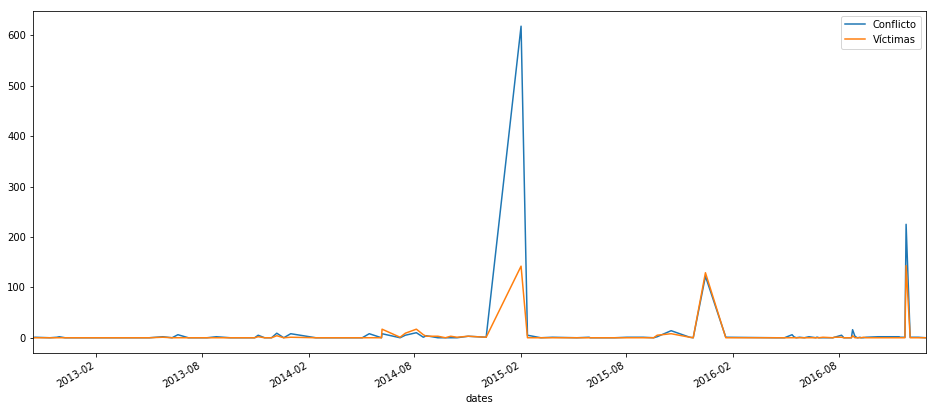

In [63]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 4.0)

df = pd.read_csv('data/mesa_files_with_book.csv')
df.columns = ['ID', 'path', 'category', 'sub_cat', 'date', 'filename']
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y");
df = df.sort_values(by=['category', 'sub_cat', 'date'])
sLength = len(df['ID'])
for index, row in df.iterrows():
    path = row[1] +'/' +  row[5]           
    file = open(path)
    word_data = file.read()
    file.close()
    count1, count3 = countWords(word_data)
    df.loc[index, 'conflict'] = count1
    df.loc[index, 'victims'] = count3
    
dates = df['date'].values
conflict = df['conflict'].values
victims = df['victims'].values

data1 = pd.DataFrame({'dates': dates, 
        'conflict': conflict})
data2 = pd.DataFrame({'dates': dates, 
        'victims': victims})

data1=data1.groupby(['dates']).sum()
data2=data2.groupby(['dates']).sum()
aux_df = pd.DataFrame({'Conflicto': data1.conflict, 'Víctimas': data2.victims}, index=data1.index)
aux_df.plot(figsize=(16,7), kind='line');

## Frecuencias de las palabras 'Conflicto' y 'Víctimas' (bar graph)

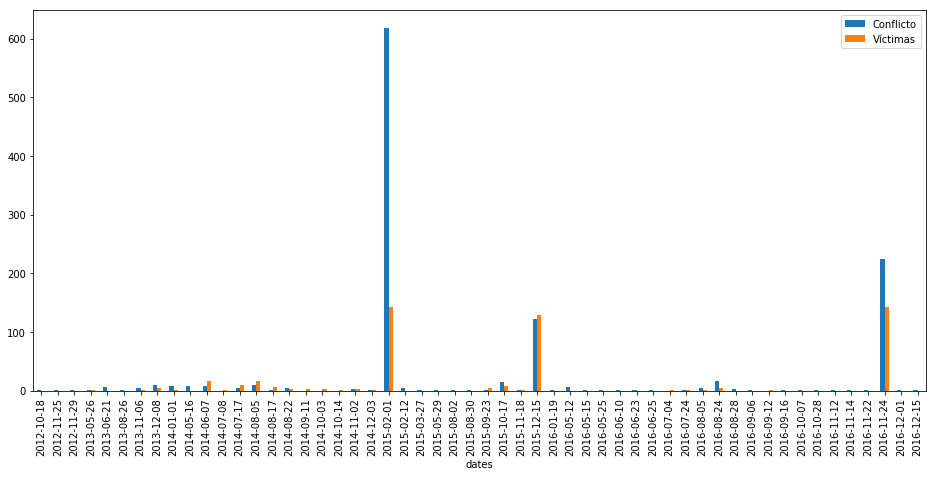

In [64]:
aux_df = aux_df.sort_index()
aux_df.index = aux_df.index.map(lambda t: t.strftime('%Y-%m-%d'))
aux_df = aux_df[(aux_df.T!= 0).any()]
aux_df.plot(figsize=(16,7), kind='bar');

## Frecuencias de las palabras 'Conflicto' y 'Víctimas' (bar graph logaritmic scale - better visualization)

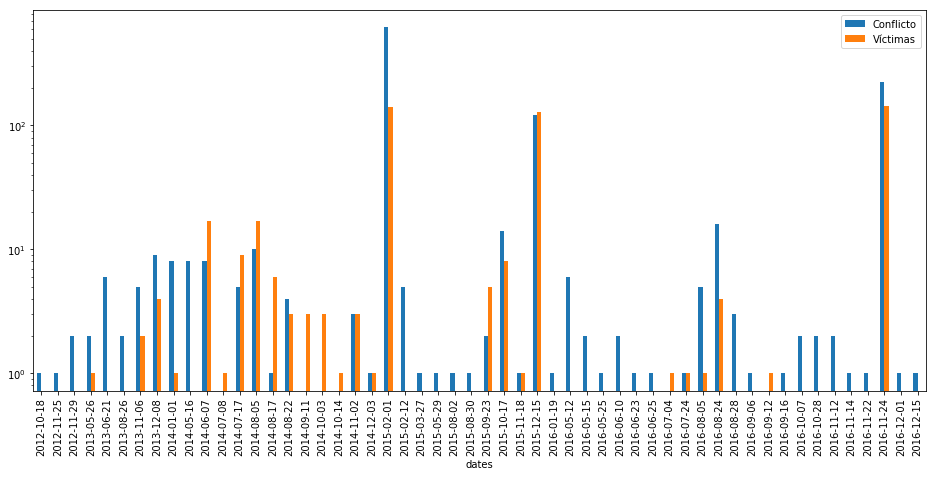

In [65]:
aux_df.plot(figsize=(16,7), kind='bar', logy=True);

## Frecuencias de las palabras 'Conflicto' y 'Víctimas' (different graphs)

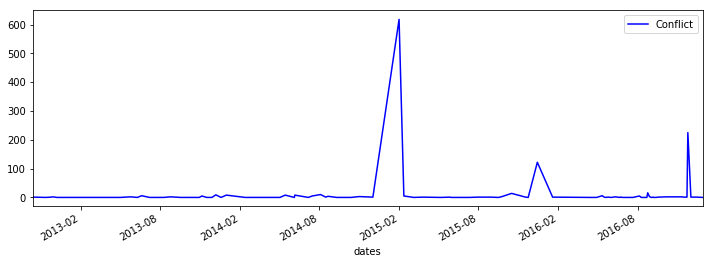

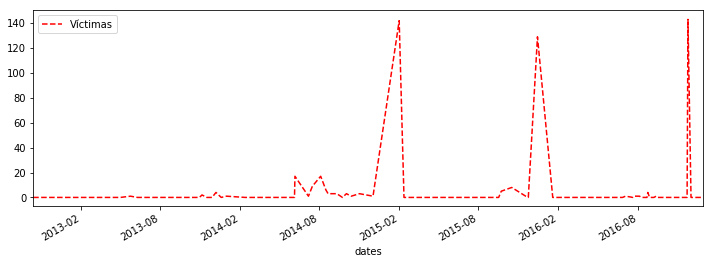

In [66]:
# Plot the data
data1.plot(x=data1.index,y='conflict', ls='solid', label='Conflict', color='blue', )

data2.plot(x=data2.index,y='victims', ls='--', label='Víctimas', color='red')

plt.legend(loc='best')
plt.show()

## 20 documentos que más utilizaron la palabra 'Conflicto'

In [67]:
pd.set_option('display.max_colwidth', -1)
df1 = df[['sub_cat', 'date', 'filename', 'conflict', 'victims']].copy()
df1 = df1.sort_index()
df1 = df1[(df1.conflict>0) | (df1.victims > 0)]
df1.sort_values(['conflict'], ascending=False).head(20)

,sub_cat,date,filename,conflict,victims
0,Acuerdo_Final,2016-11-24,a.txt,224.0,143.0
125,Relatorias,2015-02-01,una-lectura-multiple-y-pluralista-de-la-historia-1447178719-1460381905.txt,140.0,34.0
114,Borradores,2015-12-15,borrador-conjunto-acuerdo-sobre-las-victimas-del-conflicto-1450190262.txt,106.0,110.0
131,Informes,2015-02-01,acumulacion-capitalista-dominacion-de-clase-y-rebelion-armada-1447186913-1460381608.txt,81.0,4.0
127,Informes,2015-02-01,dimensiones-politicas-1447178397-1460381159.txt,61.0,4.0
124,Relatorias,2015-02-01,hacia-la-verdad-del-conflicto-insurgencia-guerrillera-y-orden-social-vigente-1447179178-1460343050.txt,61.0,10.0
135,Informes,2015-02-01,cartografia-del-conflicto-pautas-interpretativas-sobre-la-evolucion-del-conflicto-irregular-colombiano-1447171779-1460380770.txt,58.0,26.0
129,Informes,2015-02-01,estudio-sobre-los-origenes-del-conflicto-social-armado-razones-de-su-persistencia-y-sus-efectos-mas-profundos-en-la-sociedad.txt,50.0,4.0
128,Informes,2015-02-01,una-lucha-armada-al-servicio-del-statu-quo-social-y-politico-1447170837-1460380657.txt,44.0,7.0
133,Informes,2015-02-01,una-historia-simple-1447167162-1460380556.txt,42.0,9.0


## 20 documentos que mencionaron más la palabra 'Víctimas'

In [68]:
df1.sort_values(['victims'], ascending=False).head(20)

,sub_cat,date,filename,conflict,victims
0,Acuerdo_Final,2016-11-24,a.txt,224.0,143.0
114,Borradores,2015-12-15,borrador-conjunto-acuerdo-sobre-las-victimas-del-conflicto-1450190262.txt,106.0,110.0
125,Relatorias,2015-02-01,una-lectura-multiple-y-pluralista-de-la-historia-1447178719-1460381905.txt,140.0,34.0
135,Informes,2015-02-01,cartografia-del-conflicto-pautas-interpretativas-sobre-la-evolucion-del-conflicto-irregular-colombiano-1447171779-1460380770.txt,58.0,26.0
9,Comunicados,2015-12-15,comunicado-conjunto-64-15-de-diciembre-de-2015-1450190009.txt,16.0,19.0
53,Comunicados,2014-06-07,"Comunicado_Conjunto,_La_Habana,_07_de_junio_de_2014,_Versi_n_Espa_ol.txt",8.0,17.0
132,Informes,2015-02-01,los-tres-nudos-de-la-guerra-colombiana-1447173574-1460381073.txt,16.0,17.0
45,Comunicados,2014-08-05,"Comunicado_Conjunto,_La_Habana,_05_agosto_2014-Versi_n_Espa_ol.txt",10.0,17.0
126,Informes,2015-02-01,politica-y-guerra-sin-compasion-1447166720-1460380261.txt,24.0,15.0
124,Relatorias,2015-02-01,hacia-la-verdad-del-conflicto-insurgencia-guerrillera-y-orden-social-vigente-1447179178-1460343050.txt,61.0,10.0
